In [4]:
# Just import everything thats needed

import numpy as np
import pandas as pd  
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files
import array
import gsw

import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt # matplotlib contains functions for graphics and plot manipulation

import glob

from netCDF4 import Dataset, MFDataset, num2date
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [5]:
# this will go through all the profiles I have right now, while also breaking them up into pieces so I can comment out 
# some of them to only look at a certain number at a time

files1 = sorted(glob.glob('19*/profiles/*.nc'))
files2 = sorted(glob.glob('29*/profiles/*.nc'))
files3 = sorted(glob.glob('39*/profiles/*.nc'))
files4 = sorted(glob.glob('49*/profiles/*.nc'))
files5 = sorted(glob.glob('59*/profiles/*.nc'))
files6 = sorted(glob.glob('69*/profiles/*.nc'))
files7 = sorted(glob.glob('79*/profiles/*.nc'))

fil = files1+files2+files3+files4+files5+files6+files7;


#nc = Dataset(files,'r')

#file = "1900204/profiles/D1900204_120.nc"

#nc = Dataset(file,'r')

In [6]:
# Lauren's function for interpolation:

#define function to interpolate the data onto the standard depth grid given by x_int
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)):
        yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

In [8]:
import time
start_time = time.time()

#create empty arrays to append to:
Lon = np.asarray([]);
Lat = np.asarray([]);
T_m = np.asarray([]);
ct_in = np.asarray([]);
sa_in = np.asarray([]);

T_tot = np.asarray([]);
T_cnt = np.asarray([]);
T_varry = np.asarray([]);

SA_cnt = np.asarray([]);
SA_varry = np.asarray([]);

Sal = np.asarray([]);

CNT = np.asarray([]);
CT_Lon = np.asarray([]);
SA_Lon = np.asarray([]);
CT_intt = np.asarray([]);
    

for k in range(-45,-44,1): #loop through lat and lon you want to use to divide into bins
    for j in range(-45,-44,1): 
    #a = print(files[i])
        
        ct_in = np.asarray([]); #will create new array for each latitide/longitude 
        sa_in = np.asarray([]);
        
        for i in range(len(fil)):
                nc = Dataset(fil[i]) # for the nc file currently being processes, read in the correct variables and rename for ease
                
                Lon_exp = nc.variables['LONGITUDE'][0]
                Lat_exp = nc.variables['LATITUDE'][0]
                T = nc.variables['TEMP_ADJUSTED'][:]
                T[T>100]=np.nan;                PS = nc.variables['PSAL_ADJUSTED'][:]
                P = nc.variables['PRES_ADJUSTED'][:]
                
                #SIG = gsw.sigma2(SA,CT); #calculate sigma2 for profile
                
                #limit to the correct sigma2 layer
                #CT1 = CT[SIG>36.4]
                #SA1 = SA[SIG>36.4]
                #SIG1 = SIG[SIG>36.4]

                #CT2 = CT1[SIG1<37.8]
                #SA2 = SA1[SIG1<37.8]
                #SIG2 = SIG1[SIG1<37.8]
                
                #CT2 = CT2[np.isfinite(CT2)];
                #SA2 = SA2[np.isfinite(SA2)];
                
                
                #interpolate T and PS from the original profile
                zi = np.arange(0, 1950, 5) #interpolate data onto constant depth grid from 0 to 2000m with 5m resolution
                T_int = interpolate(zi, P, T)
                PS_int = interpolate(zi, P, PS)
                
                
                
                urlon = (j);
                llon = (j+1);
                
                urlat = (k);
                llat = k+1;
                
                if (Lat_exp <= llat)&(Lat_exp >= urlat):
                    if(Lon_exp <= llon)&(Lon_exp >= urlon):
                        
                        #I will be referring to T as CT and PS as SA from here on out because of using older code for the rest of it
                        ct_in = np.append(ct_in,T_int)
                        sa_in = np.append(sa_in,PS_int)
                        
                        #print(ct_in)
                    
                #T_mean = np.mean(T)
                #print(np.shape(T_mean))
                #T_tot = np.append(T_tot,T_mean)
                
                nc.close()
        ### end of going through 1 degree 
        #print(j)
        #print(k)
        #print(T_mean)
        #CT_intt = np.append(CT_intt, CT_int)
        
        #print(ct_in)
        #CT_Lon = np.append(CT_Lon,ct_in);
        #if len(ct_in)>0:
            #T_mean = np.nanmean(ct_in)
            #print(T_mean)
            #T_var = np.nanvar(ct_in)
        
        T_mean = np.mean(ct_in)
        #print(T_mean)
        T_var = np.var(ct_in)
        
        
        #SA_Lon = np.append(SA_Lon,sa_in);
        SA_mean = np.nanmean(sa_in)
        SA_var = np.nanvar(sa_in)
        S_mean = np.mean(sa_in)
        S_var = np.var(sa_in)
                    
       # CNT = np.append(CNT,1)
        
       # Lon = np.append(Lon,urlon);
       # Lat = np.append(Lat,urlat);
        
        T_cnt = np.append(T_cnt,T_mean);
        T_varry = np.append(T_varry,T_var);
        
        SA_cnt = np.append(SA_cnt,SA_mean);
        SA_varry = np.append(SA_varry,SA_var);
        
        
# print('OOF')

print("--- %s seconds ---" % (time.time() - start_time))

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater


--- 42.91015100479126 seconds ---


In [1]:
############## Below is not the main code

In [5]:
file = '1900204/profiles/D1900204_120.nc'

nc = Dataset(file)
                
Lon_exp = nc.variables['LONGITUDE'][0]
Lat_exp = nc.variables['LATITUDE'][0]
CT = nc.variables['TEMP_ADJUSTED'][:]
SA = nc.variables['PSAL_ADJUSTED'][:]
P = nc.variables['PRES_ADJUSTED'][:]
                
SIG = gsw.sigma2(SA,CT);
                
CT1 = CT[SIG>36.4]
SA1 = SA[SIG>36.4]
SIG1 = SIG[SIG>36.4]

CT2 = CT1[SIG1<37.8]
SA2 = SA1[SIG1<37.8]
SIG2 = SIG1[SIG1<37.8]
                
#CT2 = CT2[np.isfinite(CT2)];
#SA2 = SA2[np.isfinite(SA2)];
                
                
#interpolate nitrate and poc
zi = np.arange(0, 1950, 5) #interpolate data onto constant depth grid from 0 to 2000m with 5m resolution
CT_int = interpolate(zi, P, CT)
SA_int = interpolate(zi, P, SA)
P_int = interpolate(zi,P,P)
                

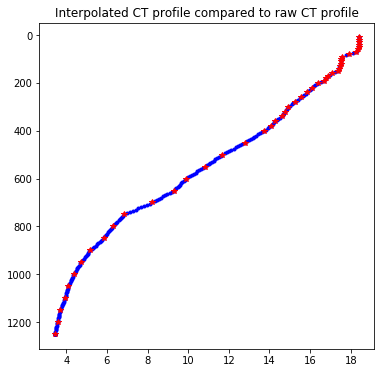

In [53]:
plt.show()
fig, axes = plt.subplots(1,1, figsize=(6,6))
ax = axes

plt.title('Interpolated CT profile compared to raw CT profile')
plt.gca().invert_yaxis()
inte=plt.plot(CT_int,P_int,'b.');
raw=plt.plot(CT,P,'r*');
#plt.legend((inte,raw),('hi','no'))

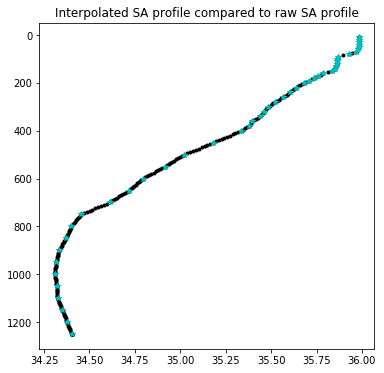

In [54]:
plt.show()
fig, axes = plt.subplots(1,1, figsize=(6,6))
ax = axes

plt.title('Interpolated SA profile compared to raw SA profile')
plt.gca().invert_yaxis()
inte=plt.plot(SA_int,P_int,'k.');
raw=plt.plot(SA,P,'c*');

In [29]:
import time
start_time = time.time()

Lon = np.asarray([]);
Lat = np.asarray([]);
T_m = np.asarray([]);
ct_in = np.asarray([]);
sa_in = np.asarray([]);

T_tot = np.asarray([]);
T_cnt = np.asarray([]);
T_varry = np.asarray([]);

SA_cnt = np.asarray([]);
SA_varry = np.asarray([]);

Sal = np.asarray([]);

CNT = np.asarray([]);
CT_Lon = np.asarray([]);
SA_Lon = np.asarray([]);
CT_intt = np.asarray([]);
    
for k in range(-45,-41,1):
    for j in range(-45,-41,1): 
    #a = print(files[i])
        
        ct_in = np.asarray([]);
        sa_in = np.asarray([]);
        
        for i in range(len(fil)):
                nc = Dataset(fil[i])
                
                Lon_exp = nc.variables['LONGITUDE'][0]
                Lat_exp = nc.variables['LATITUDE'][0]
                CT = nc.variables['TEMP_ADJUSTED'][:]
                SA = nc.variables['PSAL_ADJUSTED'][:]
                P = nc.variables['PRES_ADJUSTED'][:]
                
                SIG = gsw.sigma2(SA,CT);
                
                CT1 = CT[SIG>36.4]
                SA1 = SA[SIG>36.4]
                SIG1 = SIG[SIG>36.4]

                CT2 = CT1[SIG1<37.8]
                SA2 = SA1[SIG1<37.8]
                SIG2 = SIG1[SIG1<37.8]
                
                #CT2 = CT2[np.isfinite(CT2)];
                #SA2 = SA2[np.isfinite(SA2)];
                
                
                #interpolate nitrate and poc
                zi = np.arange(0, 1950, 5) #interpolate data onto constant depth grid from 0 to 2000m with 5m resolution
                CT_int = interpolate(zi, P, CT)
                SA_int = interpolate(zi, P, SA)
                
                
                
                urlon = (j);
                llon = (j+1);
                
                urlat = (k);
                llat = k+1;
                
                if (Lat_exp <= llat)&(Lat_exp >= urlat):
                    if(Lon_exp <= llon)&(Lon_exp >= urlon):
                        
                        ct_in = np.append(ct_in,CT_int)
                        sa_in = np.append(sa_in,SA_int)
                        
                        #print(ct_in)
                    
                #T_mean = np.mean(T)
                #print(np.shape(T_mean))
                #T_tot = np.append(T_tot,T_mean)
                
                nc.close()
        ### end of going through 1 degree 
        #print(j)
        #print(k)
        #print(T_mean)
        #CT_intt = np.append(CT_intt, CT_int)
        
        #print(ct_in)
        #CT_Lon = np.append(CT_Lon,ct_in);
        #if len(ct_in)>0:
            #T_mean = np.nanmean(ct_in)
            #print(T_mean)
            #T_var = np.nanvar(ct_in)
        
        T_mean = np.mean(ct_in)
        #print(T_mean)
        T_var = np.var(ct_in)
        
        
        #SA_Lon = np.append(SA_Lon,sa_in);
        SA_mean = np.nanmean(sa_in)
        SA_var = np.nanvar(sa_in)
        S_mean = np.mean(sa_in)
        S_var = np.var(sa_in)
                    
       # CNT = np.append(CNT,1)
        
       # Lon = np.append(Lon,urlon);
       # Lat = np.append(Lat,urlat);
        
        T_cnt = np.append(T_cnt,T_mean);
        T_varry = np.append(T_varry,T_var);
        
        SA_cnt = np.append(SA_cnt,SA_mean);
        SA_varry = np.append(SA_varry,SA_var);
        
        
# print('OOF')

print("--- %s seconds ---" % (time.time() - start_time))

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater


--- 2454.3836619853973 seconds ---


In [19]:
np.savetxt("Arg_Basin_Data_Lon", Lon, newline=" ")
np.savetxt("Arg_Basin_Data_Lat", Lat, newline=" ")
np.savetxt("Arg_Basin_Data_CT_mean_1D", T_cnt, newline=" ")
np.savetxt("Arg_Basin_Data_CT_var_1D", T_varry, newline=" ")
np.savetxt("Arg_Basin_Data_SA_mean_1D", SA_cnt, newline=" ")
np.savetxt("Arg_Basin_Data_SA_var_1D", SA_varry, newline=" ")

# T_cnt

In [9]:
T_cnt

array([28587.22221846])

In [21]:
ct_int

NameError: name 'ct_int' is not defined

In [61]:
P

masked_array(data=[[   5.2999997,   10.       ,   19.5      ,
                      30.1      ,   40.1      ,   49.5      ,
                      60.       ,   69.7      ,   80.299995 ,
                      90.       ,   99.9      ,  109.9      ,
                     119.799995 ,  129.5      ,  139.40001  ,
                     149.3      ,  159.3      ,  169.90001  ,
                     179.6      ,  189.70001  ,  199.8      ,
                     209.3      ,  219.6      ,  229.       ,
                     239.6      ,  249.5      ,  259.       ,
                     269.5      ,  279.       ,  289.       ,
                     299.6      ,  309.       ,  320.       ,
                     329.80002  ,  339.80002  ,  349.80002  ,
                     359.9      ,  379.30002  ,  399.       ,
                     449.4      ,  499.30002  ,  550.1      ,
                     599.5      ,  649.39996  ,  699.89996  ,
                     749.5      ,  799.8      ,  850.       ,
        

In [63]:
ct_in

array([], dtype=float64)